In [14]:
import numpy as np
from sklearn.datasets import make_gaussian_quantiles
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [3]:
X, y = make_gaussian_quantiles(n_features=2, n_classes=2, n_samples=300)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

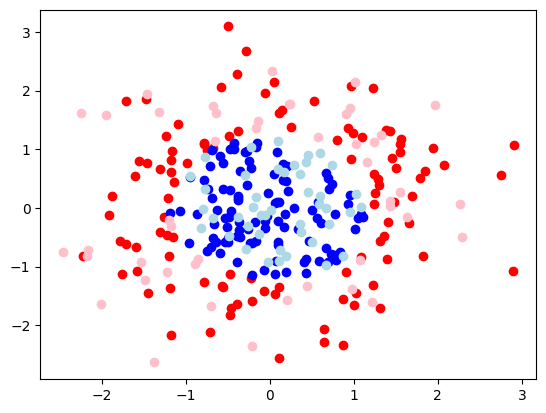

In [12]:
from matplotlib import pyplot as plt

plt.scatter(
    X_train[y_train == True][:, 0],
    X_train[y_train == True][:, 1],
    color="red",
)
plt.scatter(
    X_train[y_train == False][:, 0],
    X_train[y_train == False][:, 1],
    color="blue",
)
plt.scatter(
    X_test[y_test == True][:, 0],
    X_test[y_test == True][:, 1],
    color="pink",
)
plt.scatter(
    X_test[y_test == False][:, 0],
    X_test[y_test == False][:, 1],
    color="lightblue",
)
plt.show()

In [6]:
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

1.0

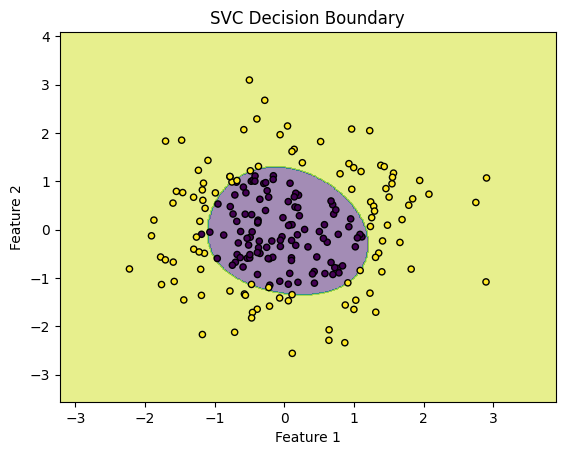

In [33]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolor="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVC Decision Boundary")
plt.show()